In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train = train.astype('float64')
test = test.astype('float64')

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

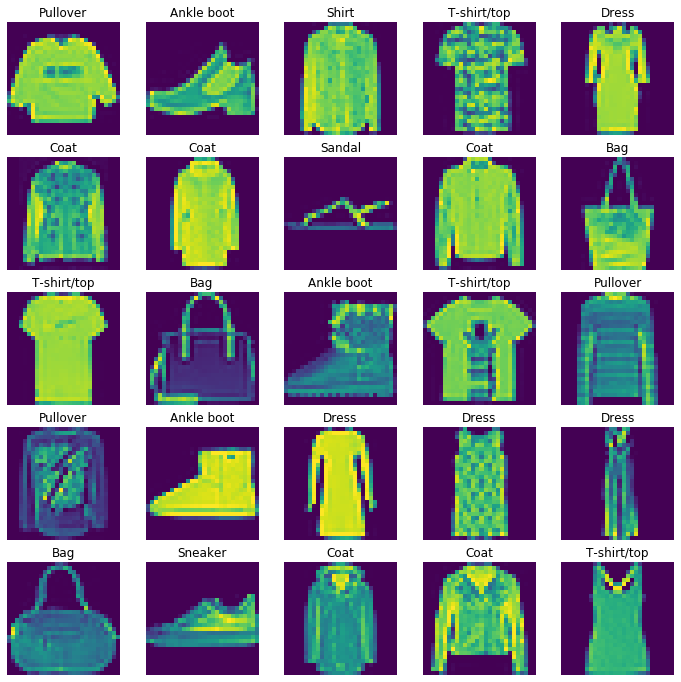

In [5]:
fig, axes = plt.subplots(5, 5, figsize = (12,12))
axes = axes.ravel()

for i in range(25):
    axes[i].imshow(train.iloc[i, 1:].values.reshape(28, 28))
    axes[i].set_title(class_names[int(train.iloc[i, 0])])
    axes[i].axis('off')

In [6]:
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

In [7]:
X_train, X_test = X_train/255, X_test/255

In [8]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [10]:
callbacks = [
    
]

In [35]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, 3, 3, activation='relu'))
cnn_model.add(Conv2D(32, 3, 3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [36]:
cnn_fit = cnn_model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=100,
    verbose=1,
    validation_data=(X_val,y_val),
    callbacks=[csv_logger]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 6s 131us/step - loss: 1.1729 - accuracy: 0.6037 - val_loss: 0.6028 - val_accuracy: 0.7838
Epoch 2/100
48000/48000 [==============================] - 5s 100us/step - loss: 0.5554 - accuracy: 0.7943 - val_loss: 0.4813 - val_accuracy: 0.8268
Epoch 3/100
48000/48000 [==============================] - 5s 100us/step - loss: 0.4649 - accuracy: 0.8324 - val_loss: 0.4389 - val_accuracy: 0.8394
Epoch 4/100
48000/48000 [==============================] - 5s 100us/step - loss: 0.4230 - accuracy: 0.8500 - val_loss: 0.3917 - val_accuracy: 0.8608
Epoch 5/100
48000/48000 [==============================] - 5s 101us/step - loss: 0.3894 - accuracy: 0.8609 - val_loss: 0.3646 - val_accuracy: 0.8727
Epoch 6/100
48000/48000 [==============================] - 5s 103us/step - loss: 0.3695 - accuracy: 0.8679 - val_loss: 0.3722 - val_accuracy: 0.8692
Epoch 7/100
48000/48000 [==============================]

Text(0.5, 1.0, 'Train - Accuracy')

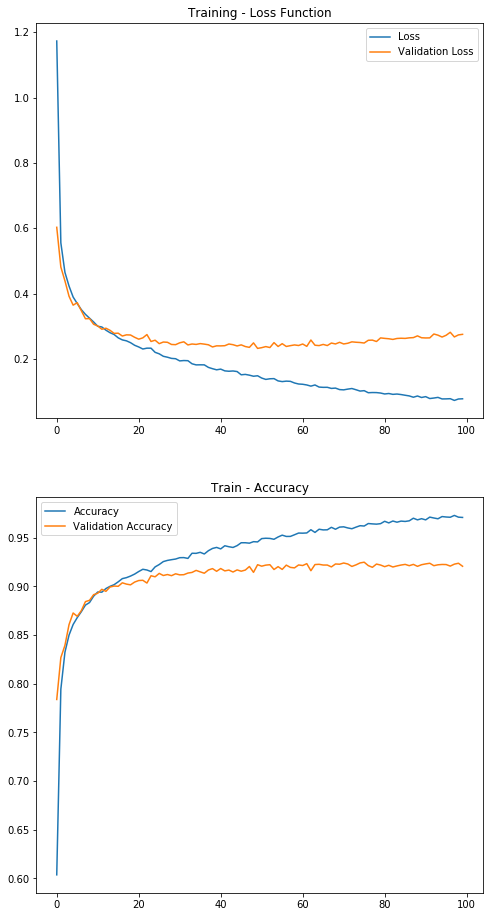

In [37]:

fig, axes = plt.subplots(2, 1, figsize = (8, 16))
axes = axes.ravel()

axes[0].plot(cnn_fit.history['loss'], label='Loss')
axes[0].plot(cnn_fit.history['val_loss'], label='Validation Loss')
axes[0].legend()
axes[0].set_title('Training - Loss Function')

axes[1].plot(cnn_fit.history['accuracy'], label='Accuracy')
axes[1].plot(cnn_fit.history['val_accuracy'], label='Validation Accuracy')
axes[1].legend()
axes[1].set_title('Train - Accuracy')

In [38]:
score = cnn_model.evaluate(X_test, y_test, verbose = 1)
print('Test Loss : ', score[0])
print('Test Accuracy : ', score[1])

10000/10000 [==============================] - 1s 127us/step
Test Loss :  0.2689568581096828
Test Accuracy :  0.9251999855041504


In [39]:
y_pred = cnn_model.predict_classes(X_test)

In [44]:
tar_class = [class_names[i] for i in range(10)]
print(classification_report(y_test, y_pred, target_names = tar_class))

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.88      0.87      1000
     Trouser       0.98      0.99      0.99      1000
    Pullover       0.92      0.86      0.89      1000
       Dress       0.93      0.92      0.93      1000
        Coat       0.86      0.93      0.90      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.80      0.77      0.78      1000
     Sneaker       0.95      0.98      0.96      1000
         Bag       0.98      0.99      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.92     10000
weighted avg       0.93      0.93      0.92     10000

